## Objetivos

- Analizar como se distribuye el numero de paradas por ruta.
- Aplicarlo a `model_apply_inputs/new_route_data.json` (nuevos)
- Aplicarlo a `model_build_inputs/route_data.json` (historicos)

---

# ... Model_Apply ...

## Cargar los datos

Ver `data_structures.jl`.

In [1]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

route_data_script = joinpath("..", "src", "route_data.jl")
include(route_data_script);

data_json = joinpath("..", "data", "model_apply_inputs", "new_route_data.json");
route_data = read_json(data_json)

@time data = parse_route_data(route_data);

  1.207348 seconds (1.92 M allocations: 111.975 MiB, 12.12% gc time, 99.71% compilation time)


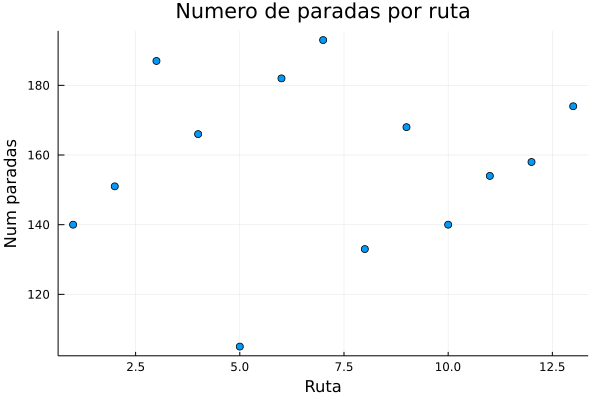

In [2]:
using Plots

num_paradas = [length(R.stops) for R in data]

# xticks=[("$i", i) for i in 1:13], 
plot(1:13, [length(R.stops) for R in data], seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

## Analisis de la zona por ruta

In [3]:
length(data) # numero de rutas cargadas

13

In [4]:
R = data[1]; # selecciono la primer ruta
typeof(R)

Route{Stop}

In [5]:
S = R.stops;
typeof(S), length(S)

(Vector{Stop}, 140)

In [6]:
x = S[1] # primer stop

Stop("JA", 34.109231, -117.670708, true, Zone('H', "24.1A"))

In [7]:
is_station(x)

false

In [8]:
is_station.(S); # anda de manera automatica (broadcast)

In [9]:
idx = findall(x -> x < 34, latitude.(S))

1-element Vector{Int64}:
 132

In [10]:
S[idx]

1-element Vector{Stop}:
 Stop("LO", 33.965477, -117.653303, false, Zone('0', ""))

In [11]:
all_stations = findall(is_station, S)

1-element Vector{Int64}:
 132

In [12]:
popat!(S, idx[1])

Stop("LO", 33.965477, -117.653303, false, Zone('0', ""))

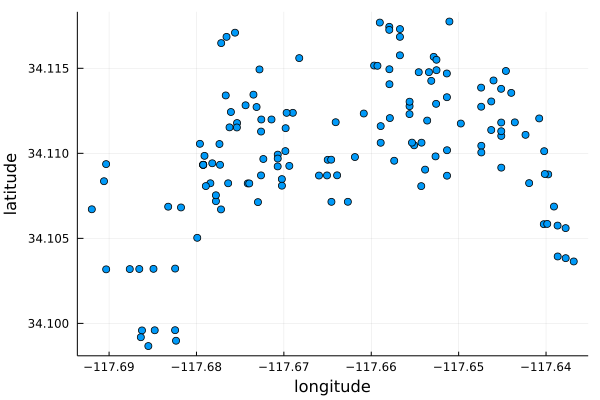

In [13]:
xval = longitude.(S)
yval = latitude.(S)
plot(xval, yval, xlab="longitude", ylab="latitude", seriestype=:scatter, lab="")

## Guardar rutas en formato CSV

In [14]:
data = parse_route_data(route_data)

for R in data
    write_csv(R) 
end

# ... Model_Build ...

## Cargar los datos

In [1]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

route_data_script = joinpath("..", "src", "route_build_data.jl")
include(route_data_script);

data_json = joinpath("..", "data", "model_build_inputs", "route_data.json");
route_data = read_json(data_json)

@time data = parse_route_data_build(route_data);

  2.567239 seconds (8.62 M allocations: 389.087 MiB, 31.83% compilation time)


In [9]:
data

6112-element Vector{Route_Build{Stop}}:
 Route_Build{Stop}("c0538d99-05d1-436b-b0aa-efe26603d606", "DCH3", Date("2018-07-24"), Time(15, 30), 3.313071e6, 3, Stop[Stop("BC", 41.896911, -88.351055, true, Zone('D', "6.2D")), Stop("WB", 41.879159, -88.370817, true, Zone('D', "6.2E")), Stop("BV", 41.884344, -88.334379, true, Zone('D', "6.1C")), Stop("OP", 41.875351, -88.390648, true, Zone('D', "6.2H")), Stop("DP", 41.891701, -88.356287, true, Zone('D', "6.1D")), Stop("OM", 41.879027, -88.38632, true, Zone('D', "6.2G")), Stop("TE", 41.872362, -88.390551, true, Zone('D', "6.2H")), Stop("NY", 41.88725, -88.351245, true, Zone('D', "6.2C")), Stop("SR", 41.875923, -88.369276, true, Zone('D', "6.2E")), Stop("HM", 41.884828, -88.35277, true, Zone('D', "6.2C"))  …  Stop("MK", 41.88518, -88.348468, true, Zone('D', "6.2C")), Stop("HY", 41.887061, -88.347971, true, Zone('D', "6.3C")), Stop("RP", 41.866287, -88.38819, true, Zone('D', "6.3H")), Stop("SG", 41.88493, -88.34813, true, Zone('D', "6.2C")), Sto

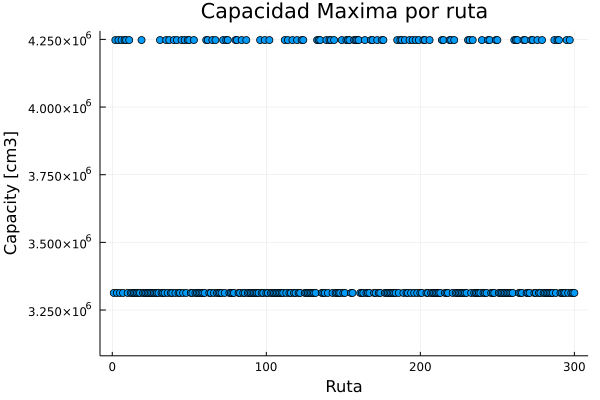

In [82]:
using Plots

capacidad_maxima = [R.capacity for R in data]

# xticks=[("$i", i) for i in 1:13], 
plot(1:300, [R.capacity for R in data], seriestype=:scatter, xlab="Ruta", ylab="Capacity [cm3]", lab="", title="Capacidad Maxima por ruta")

In [81]:
capacidad_maxima

6112-element Vector{Float64}:
 3.313071e6
 4.247527e6
 3.313071e6
 4.247527e6
 3.313071e6
 4.247527e6
 3.313071e6
 4.247527e6
 4.247527e6
 3.313071e6
 4.247527e6
 3.313071e6
 3.313071e6
 ⋮
 4.247527e6
 3.313071e6
 3.313071e6
 3.313071e6
 4.247527e6
 3.313071e6
 4.247527e6
 4.247527e6
 3.313071e6
 4.247527e6
 3.313071e6
 4.247527e6

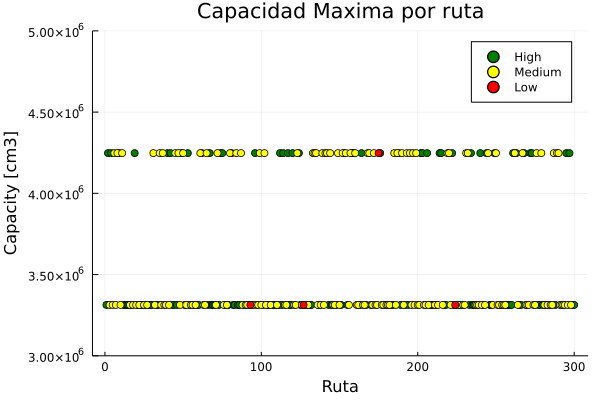

In [83]:
using Plots

capacidad_low = [(R.score== 1 ? R.capacity : 0) for R in data]
capacidad_medium = [(R.score== 2 ? R.capacity : 0) for R in data]
capacidad_high = [(R.score== 3 ? R.capacity : 0) for R in data]

plot(1:300, capacidad_high, c=:green, seriestype=:scatter, ylims = (3000000,5000000), xlab="Ruta", ylab="Capacity [cm3]", label="High", title="Capacidad Maxima por ruta")
plot!(1:300, capacidad_medium, c=:yellow, seriestype=:scatter, label="Medium")
plot!(1:300, capacidad_low, c=:red, seriestype=:scatter, label="Low")
# xticks=[("$i", i) for i in 1:13], 
#plot(1:300, [R.capacity for R in data], seriestype=:scatter, xlab="Ruta", ylab="Capacity [cm3]", lab="", title="Numero de paradas por ruta")

In [90]:
println("Capacidad <4M Score Low: "*string(length([R.capacity for R in data if R.score==1 && R.capacity<4000000 ])))
println("Capacidad <4M Score Medium: "*string(length([R.capacity for R in data if R.score==2 && R.capacity<4000000 ])))
println("Capacidad <4M Score High: "*string(length([R.capacity for R in data if R.score==3 && R.capacity<4000000 ])))
println("Capacidad >4M Score Low: "*string(length([R.capacity for R in data if R.score==1 && R.capacity>4000000 ])))
println("Capacidad >4M Score Medium: "*string(length([R.capacity for R in data if R.score==2 && R.capacity>4000000 ])))
println("Capacidad >4M Score High: "*string(length([R.capacity for R in data if R.score==3 && R.capacity>4000000 ])))

Capacidad <4M Score Low: 66
Capacidad <4M Score Medium: 2240
Capacidad <4M Score High: 1880
Capacidad >4M Score Low: 36
Capacidad >4M Score Medium: 1052
Capacidad >4M Score High: 838


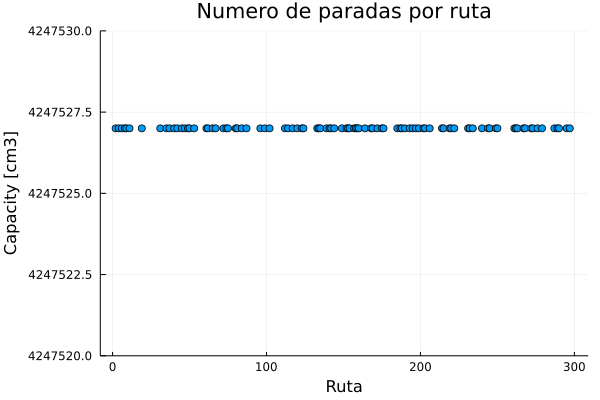

In [77]:
using Plots

# xticks=[("$i", i) for i in 1:13], 
plot(1:300, [R.capacity for R in data], seriestype=:scatter, ylims = (4247520, 4247530), xlab="Ruta", ylab="Capacity [cm3]", lab="", title="Capacidad Maxima por ruta")

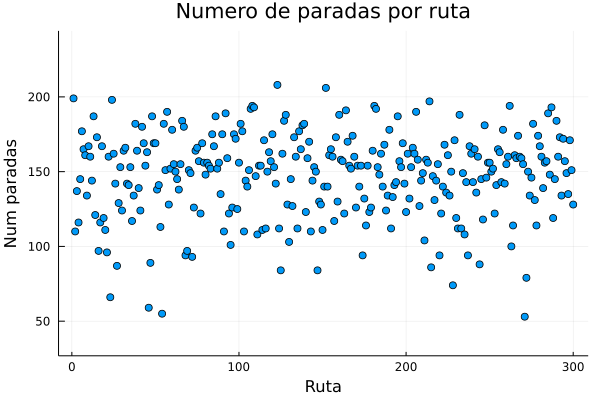

In [51]:
using Plots

num_paradas = [length(R.stops) for R in data]

# xticks=[("$i", i) for i in 1:13], 
plot(1:300, [length(R.stops) for R in data], seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

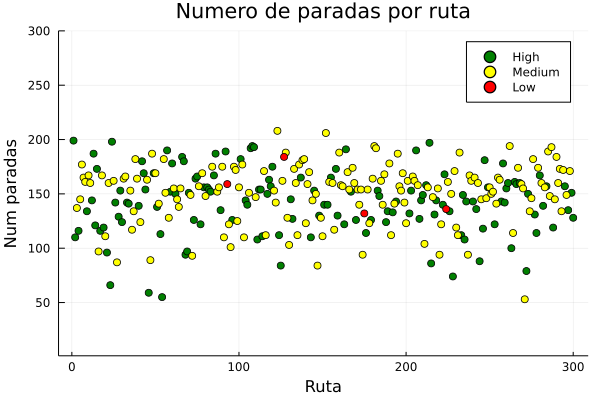

In [79]:
using Plots

num_paradas_low = [(R.score== 1 ? length(R.stops) : 0) for R in data]
num_paradas_medium = [(R.score== 2 ? length(R.stops) : 0) for R in data]
num_paradas_high = [(R.score== 3 ? length(R.stops) : 0) for R in data]

# xticks=[("$i", i) for i in 1:13], 
plot(1:300, num_paradas_high, c=:green, seriestype=:scatter, ylims = (1,300), xlab="Ruta", ylab="Num paradas", label="High", title="Numero de paradas por ruta")
plot!(1:300, num_paradas_medium, c=:yellow, seriestype=:scatter, label="Medium")
plot!(1:300, num_paradas_low, c=:red, seriestype=:scatter, label="Low")

In [95]:
num_paradas_low_out = [(R.score== 1 ? length(R.stops) : 0) for R in data if length(R.stops)<=147/2]
num_paradas_medium_out = [(R.score== 2 ? length(R.stops) : 0) for R in data if length(R.stops)<=147/2]
num_paradas_high_out = [(R.score== 3 ? length(R.stops) : 0) for R in data if length(R.stops)<=147/2]

117-element Vector{Int64}:
 66
 59
 55
  0
 65
 43
 71
  0
  0
 73
  0
 62
 70
  ⋮
 63
 67
 65
 62
 64
 60
  0
 42
 73
  0
 72
  0

In [96]:
length(num_paradas_low_out)+length(num_paradas_medium_out)+length(num_paradas_high_out)

351

In [92]:
using Statistics
promedio_paradas = mean(num_paradas)
println("PROMEDIO: "*string(promedio_paradas))
println("NumParadas <Mean Score Low: "*string(length([length(R.stops) for R in data if R.score==1 && length(R.stops)<promedio_paradas ])))
println("NumParadas <Mean Score Medium: "*string(length([length(R.stops) for R in data if R.score==2 && length(R.stops)<promedio_paradas ])))
println("NumParadas <Mean Score High: "*string(length([length(R.stops) for R in data if R.score==3 && length(R.stops)<promedio_paradas ])))
println("NumParadas >=Mean Score Low: "*string(length([length(R.stops) for R in data if R.score==1 && length(R.stops)>=promedio_paradas ])))
println("NumParadas >=Mean Score Medium: "*string(length([length(R.stops) for R in data if R.score==2 && length(R.stops)>=promedio_paradas ])))
println("NumParadas >=Mean Score High: "*string(length([length(R.stops) for R in data if R.score==3 && length(R.stops)>=promedio_paradas ])))

PROMEDIO: 147.9919829842932
NumParadas <Mean Score Low: 43
NumParadas <Mean Score Medium: 1204
NumParadas <Mean Score High: 1485
NumParadas >=Mean Score Low: 59
NumParadas >=Mean Score Medium: 2088
NumParadas >=Mean Score High: 1233


In [28]:
using Plots

score = [R.score for R in data]

score_low = [R.score for R in data if R.score==1]
score_medium = [R.score for R in data if R.score==2]
score_high = [R.score for R in data if R.score==3]

println("Score LOW: "*string(length(score_low)))
println("Score MEDIUM: "*string(length(score_medium)))
println("Score HIGH: "*string(length(score_high)))

# xticks=[("$i", i) for i in 1:13], 
#plot(1:100, [length(R.stops) for R in data], seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

Score LOW: 102
Score MEDIUM: 3292
Score HIGH: 2718


In [17]:
length(score_high)

2718

In [97]:
for R in data
    write_csv_build(R) 
end